# COVID + VIRAL PNEUMONIA DETECTING CONVOLUTIONAL NEURAL NETWORK MODEL

In [197]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical 
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import pickle

In this project, I am building a CNN to classify images. Given the X-ray image of a patient, my CNN model will be able to predict whether the person has Covid, Viral Pneumonia, or a normal ( not Covid, or Viral pneumonia) X-ray report

# Image Conversion

I am going to use the following labels to classify the images:

0. Normal
1. Covid
2. Viral Pneumonia

In [166]:
valid_image_types = [".jpeg",".jpg",".gif",".png",".tga"] # these are the image extensions my model initially recognizes 

### Converting all training images into .png file type and reshaping them
Given a varity of image types, it is imprtant to convert them all under one single hood. Different image types are configured in different ways if we look at it from a lower level. 

I decided to choose .png as my image type, and given any size of image, the model will resize it to a shape of 450x450 pixels.

In [167]:
count=0 # Index of images

path = "Data/train/Covid"
for file in os.listdir(path):
    img_type =  os.path.splitext(file)[1]
    
    if img_type in valid_image_types:
        im = Image.open(os.path.join(path,file))
        im = im.resize((450,450)) # reshaping the image
        new_path = 'Data/newData/train2/'+str(count)+'.png'
        im.save(new_path)
        count+=1
        
path = "Data/train/Normal"
for file in os.listdir(path):
    img_type =  os.path.splitext(file)[1]
    
    if img_type in valid_image_types:
        im = Image.open(os.path.join(path,file))
        im = im.resize((450,450)) # reshaping the image
        new_path = 'Data/newData/train2/'+str(count)+'.png'
        im.save(new_path)
        count+=1
        
path = "Data/train/Viral Pneumonia"
for file in os.listdir(path):
    img_type =  os.path.splitext(file)[1]
    
    if img_type in valid_image_types:

        im = Image.open(os.path.join(path,file))
        im = im.resize((450,450)) # reshaping the image
        new_path = 'Data/newData/train2/'+str(count)+'.png'
        im.save(new_path)
        count+=1
        
print("Done Processing Training Images")

Done Processing Training Images


### Converting all testing images into .png file type and reshaping them

In [168]:
count=0 # Index of images

path = "Data/test/Covid"
for file in os.listdir(path):
    img_type =  os.path.splitext(file)[1]
    
    if img_type in valid_image_types:
        im = Image.open(os.path.join(path,file))
        im = im.resize((450,450)) # reshaping the image
        new_path = 'Data/newData/test2/'+str(count)+'.png'
        im.save(new_path)
        count+=1
        
path = "Data/test/Normal"
for file in os.listdir(path):
    img_type =  os.path.splitext(file)[1]
    
    if img_type in valid_image_types:
        im = Image.open(os.path.join(path,file))
        im = im.resize((450,450)) # reshaping the image
        new_path = 'Data/newData/test2/'+str(count)+'.png'
        im.save(new_path)
        count+=1
        
path = "Data/test/Viral Pneumonia"
for file in os.listdir(path):
    img_type =  os.path.splitext(file)[1]
    
    if img_type in valid_image_types:
        im = Image.open(os.path.join(path,file))
        im = im.resize((450,450)) # reshaping the image
        new_path = 'Data/newData/test2/'+str(count)+'.png'
        im.save(new_path)
        count+=1
        
print("Done Processing Testing Images")

Done Processing Testing Images


# Cleaning the Training Data
Now, it is time to read the newly configured images and turning them into numpy arrays of pixel intensities. 

In [177]:
path = "Data/newData/train2" # src folder containing the images

X_train = np.empty((251,450,450,1))
training_data_labels_index = {}
for i in range(0,111): training_data_labels_index[i] = 1
for i in range(111,181): training_data_labels_index[i] = 0
for i in range(181,251): training_data_labels_index[i] = 2
    
# Loading the images and converting them into pixels
for img in os.listdir(path):
    ori_img = mpimg.imread(os.path.join(path,img))
    # Handling the pixel density
    if ori_img.ndim == 2:
        image = ori_img[:,:]
    elif ori_img.ndim == 3:
        image = ori_img[:,:,0]
    else:
        image = ori_img[:,:,:,0]
        
    '''mapping the image to it's corresponding label'''
    ind = img.index(".png")
    label = int(img[:ind])
    X_train[label,:,:,:] = image.reshape((450,450,1)) # Adding to the training array

y_train = np.empty((251,))
y_train[0:111] = 1
y_train[111:181] = 0
y_train[181:251] = 2

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Label Encoding 
y_train = to_categorical(y_train, num_classes = 3)
y_val = to_categorical(y_val, num_classes = 3)

# Cleaning the Testing Data

In [178]:
path = "Data/newData/test2" # src folder containing the images

X_test = np.empty((66,450,450,1))

testing_data_labels_index = {}
for i in range(0,26): testing_data_labels_index[i] = 1
for i in range(26,46): testing_data_labels_index[i] = 0
for i in range(46,66): testing_data_labels_index[i] = 2

# Loading the images and converting them into pixels
for img in os.listdir(path):
    ori_img = mpimg.imread(os.path.join(path,img))
    # Handling the pixel density
    if ori_img.ndim == 2:
        image = ori_img[:,:]
    elif ori_img.ndim == 3:
        image = ori_img[:,:,0]
    else:
        image = ori_img[:,:,:,0]
        
    '''mapping the image to it's corresponding label'''
    ind = img.index(".png")
    label = int(img[:ind])
    X_test[label,:,:,:] = image.reshape((450,450,1)) # Adding to the training array
    
y_test = np.empty((66,))
y_test[0:26] = 1
y_test[26:46] = 0
y_test[46:66] = 2
# Label Encoding 
y_test = to_categorical(y_test, num_classes = 3)

## Data Augmentation

In [179]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Building the CNN model

In [180]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (450,450,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(900, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

# Defining the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
optimizer=Adam()

# Compiling the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Model Hyperparameters
epochs = 50
batch_size = 14

## Training the CNN Model

In [181]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/50
15/15 [==============================] - 42s 3s/step - loss: 65.2940 - accuracy: 0.3473 - val_loss: 5.1388 - val_accuracy: 0.6078
Epoch 2/50
15/15 [==============================] - 37s 2s/step - loss: 8.9566 - accuracy: 0.5918 - val_loss: 1.6686 - val_accuracy: 0.6471
Epoch 3/50
15/15 [==============================] - 37s 2s/step - loss: 2.9363 - accuracy: 0.7698 - val_loss: 0.4307 - val_accuracy: 0.9020
Epoch 4/50
15/15 [==============================] - 37s 2s/step - loss: 0.8535 - accuracy: 0.8578 - val_loss: 0.6053 - val_accuracy: 0.9020
Epoch 5/50
15/15 [==============================] - 36s 2s/step - loss: 0.5252 - accuracy: 0.8826 - val_loss: 1.0102 - val_accuracy: 0.7255
Epoch 6/50
15/15 [==============================] - 38s 3s/step - loss: 0.3078 - accuracy: 0.8769 - val_loss: 0.9151 - val_accuracy: 0.8039
Epoch 7/50
15/15 [==============================] - 39s 3s/step - loss: 0.1166 - accuracy: 0.9502 - val_loss: 0.7802 - val_accuracy: 0.7647
Epoch 8/50
15/15 [=

# Model Evaluation

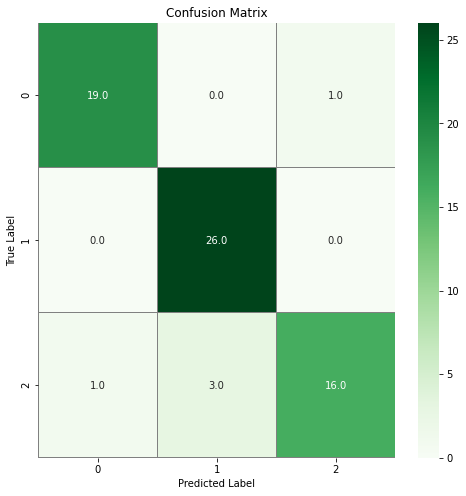

In [182]:
# Predict the values from the Testing dataset
y_hat = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_hat_classes = np.argmax(y_hat,axis = 1) 
# Convert testing observations to one hot vectors
y_test = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_hat_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [189]:
y_hat_classes = y_hat_classes.reshape((-1,1))
y_test = y_test.reshape((-1,1))

acc_scr = (round(accuracy_score(y_test, y_hat_classes), 3) * 100)
print(f"Accuracy of the CNN model: {acc_scr}%")

Accuracy of the CNN: 92.4%


In [193]:
print(classification_report(y_test, y_hat_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.90      1.00      0.95        26
           2       0.94      0.80      0.86        20

    accuracy                           0.92        66
   macro avg       0.93      0.92      0.92        66
weighted avg       0.93      0.92      0.92        66



# Model Summary

In [194]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 450, 450, 8)       208       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 225, 225, 8)       0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 225, 225, 8)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 225, 225, 16)      1168      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 200704)          

# Saving the model to disk

In [205]:
model.save('Final Model/')

INFO:tensorflow:Assets written to: Final Model/assets
